In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd gdrive/My Drive/Colab_Notebooks/Ociuz/2.Harmful_Object_Detection

/content/gdrive/My Drive/Colab_Notebooks/Ociuz/2.Harmful_Object_Detection


In [1]:
!ls

'code for documentation.docx'   test11.jpg
 Dataset		        test12.jpg
'Final YOLOv5 model'	        test13.jpg
 frontend		        test_gun.jpg
 HarmfulPPT.pptx	        test_knife.jpg
 Part_1_YOLO_Training.ipynb    'Weapon Detection (1).docx'
 Part_2_Test_model.ipynb        web_app
 test10.jpg		        yolov5s.pt


In [4]:
import torch
import cv2
#from google.colab.patches import cv2_imshow

In [5]:
# Load the YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5s.pt')

/usr/local/lib/python3.10/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLOv5 🚀 2024-12-6 Python-3.10.12 torch-2.5.1+cu121 CPU

Fusing layers... 
Model summary: 213 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [6]:
!ls

 Dataset		      Part_2_Test_model.ipynb   test13.jpg		     yolov5s.pt
 frontend		      test10.jpg	        test_gun.jpg
 HarmfulPPT.pptx	      test11.jpg	        test_knife.jpg
 Part_1_YOLO_Training.ipynb   test12.jpg	       'Weapon Detection (1).docx'


In [7]:
!python --version

Python 3.10.12


In [ ]:
# Read the image of a gun


image_path = 'test10.jpg'
image = cv2.imread(image_path)

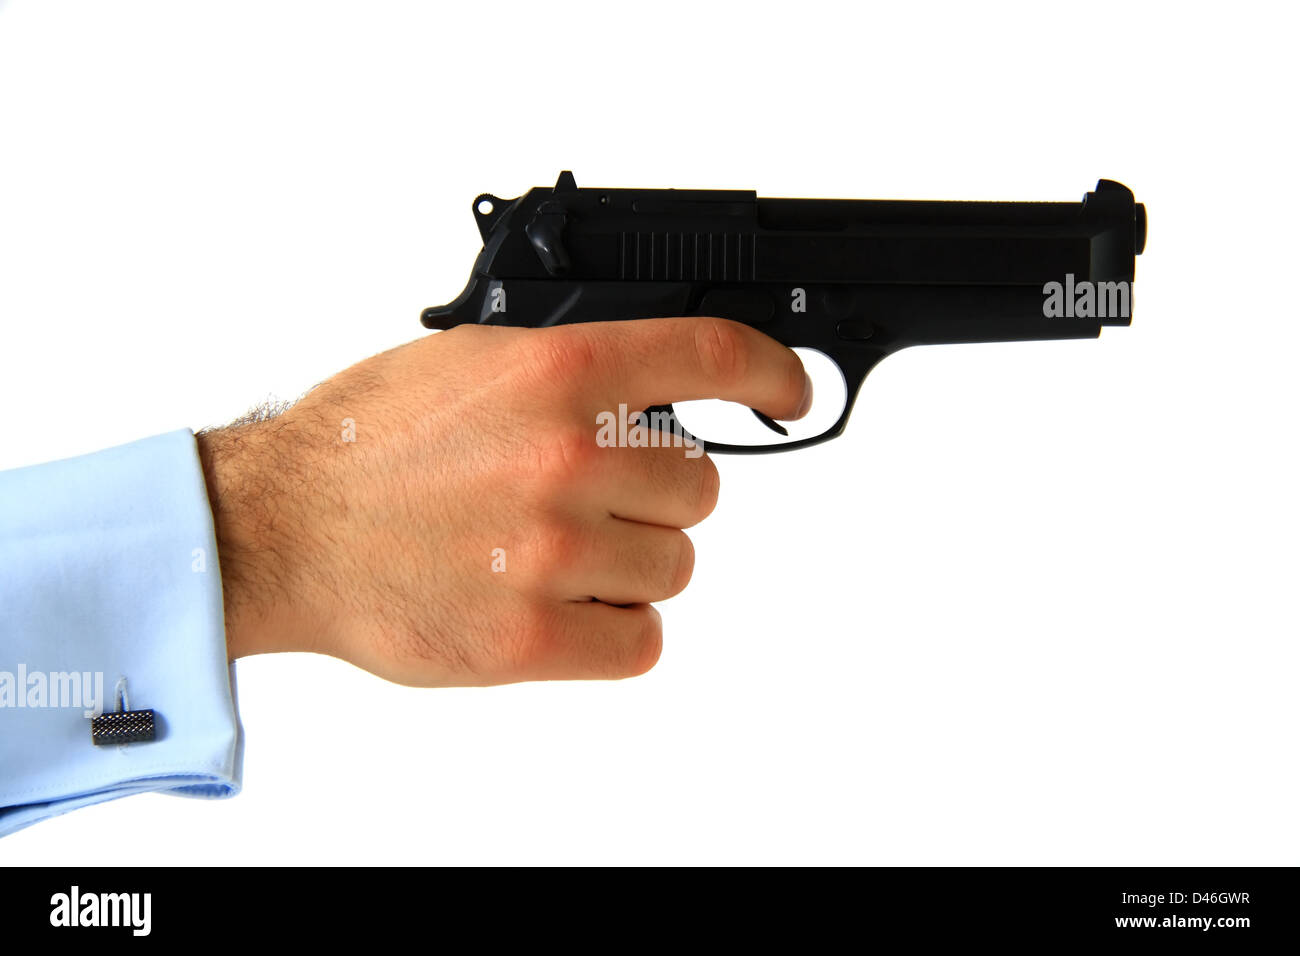

In [ ]:
cv2_imshow(image)

In [ ]:
# Convert image from BGR to RGB (YOLOv5 expects RGB images)
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Perform inference
results = model(rgb_image)

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


In [ ]:
results

YOLOv5 <class 'models.common.Detections'> instance
image 1/1: 956x1300 1 pistol
Speed: 7.1ms pre-process, 277.2ms inference, 1.1ms NMS per image at shape (1, 3, 480, 640)

In [ ]:
# Extract detections
detections = results.xyxy[0].cpu().numpy()  # Bounding boxes in [x1, y1, x2, y2, confidence, class]
confidence_threshold = 0.2  # Set confidence threshold to 60%



# Draw bounding boxes and labels
for detection in detections:
    x1, y1, x2, y2, conf, cls = detection
    if conf >= confidence_threshold:
        label = f"{model.names[int(cls)]} {conf:.2f}"
        # Draw rectangle
        cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
        # Put label
        cv2.putText(image, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

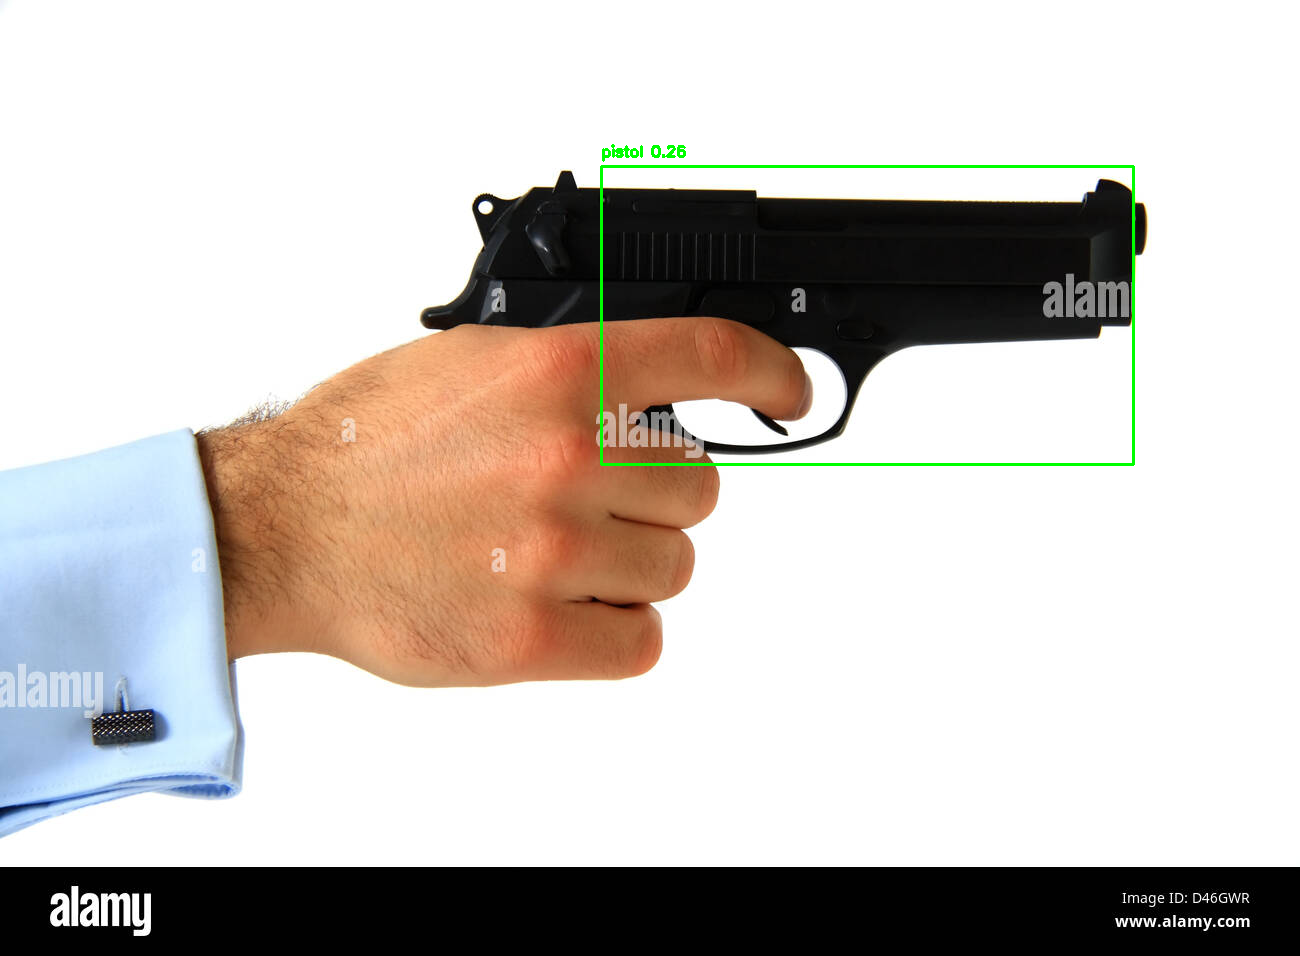

In [ ]:
cv2_imshow(image)

In [ ]:
# Read the image of a knife


image_path = 'test_knife.jpg'
image = cv2.imread(image_path)

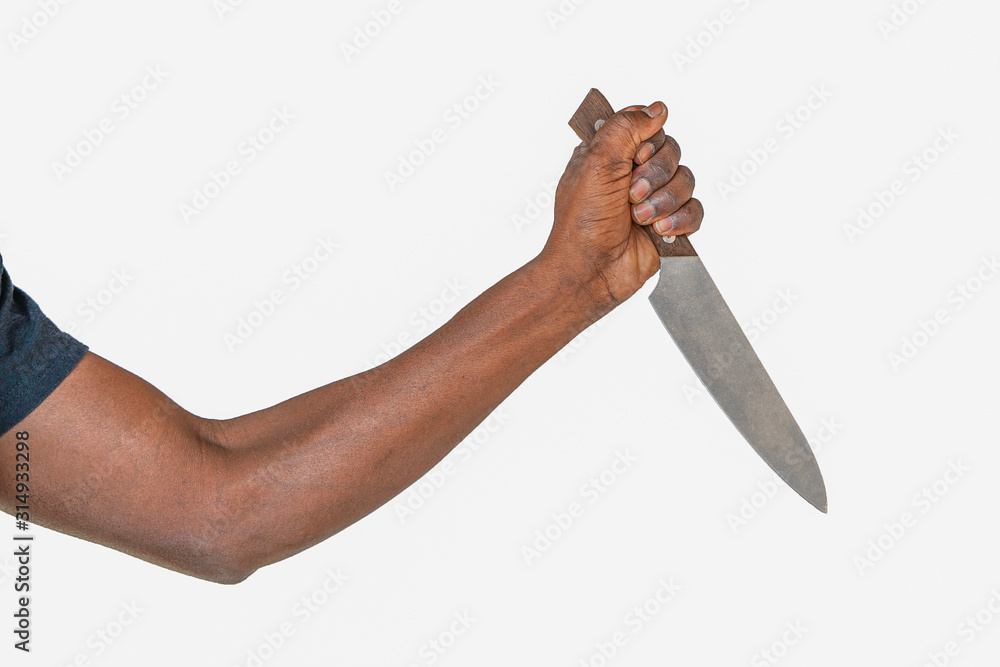

In [ ]:
cv2_imshow(image)

In [ ]:
# Convert image from BGR to RGB (YOLOv5 expects RGB images)
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Perform inference
results = model(rgb_image)

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


In [ ]:
# Extract detections
detections = results.xyxy[0].cpu().numpy()  # Bounding boxes in [x1, y1, x2, y2, confidence, class]
confidence_threshold = 0.6  # Set confidence threshold to 60%



# Draw bounding boxes and labels
for detection in detections:
    x1, y1, x2, y2, conf, cls = detection
    if conf >= confidence_threshold:
        label = f"{model.names[int(cls)]} {conf:.2f}"
        # Draw rectangle
        cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
        # Put label
        cv2.putText(image, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

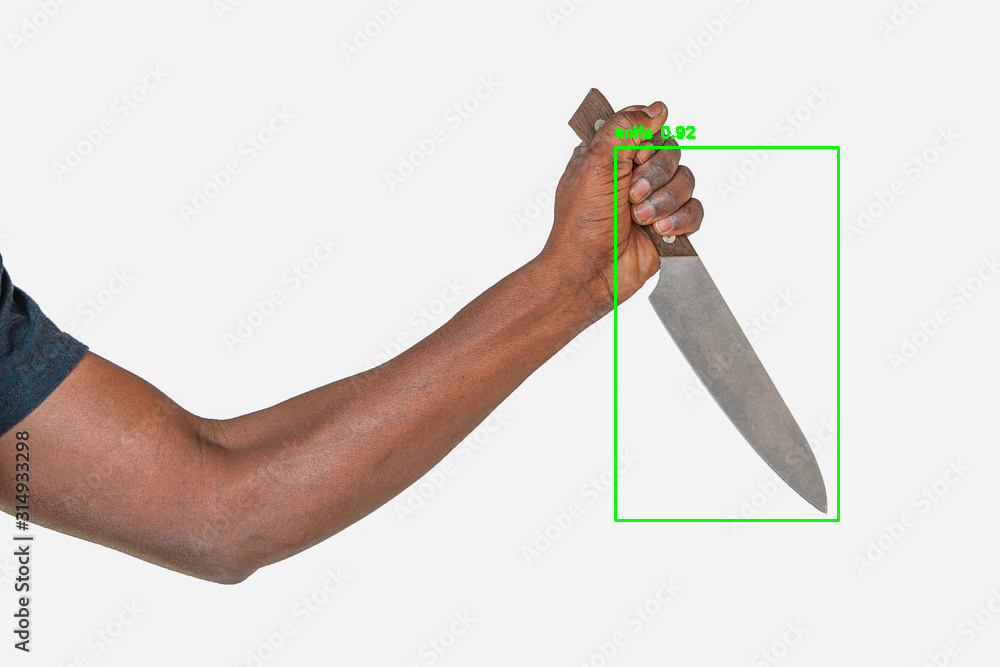

In [ ]:
cv2_imshow(image)